First connect to google drive 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Clone the github repo and install required modules

In [2]:
%cd /content/gdrive/MyDrive/project
!git clone --branch master https://github.com/Yiwei2417/yolo_person_tracking.git
!git pull
%cd yolo_person_tracking/yolov5
!pip3 install --quiet -r requirements.txt

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2022-4-24 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.0/166.8 GB disk)


Test before fine-tune

In [16]:
!python detect.py --weights yolov5s.pt --img 1920 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[1920, 1920], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-4-24 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/10 /content/gdrive/MyDrive/project/yolo_person_tracking/yolov5/data/images/1.png: 1088x1920 2 persons, Done. (0.024s)
image 2/10 /content/gdrive/MyDrive/project/yolo_person_tracking/yolov5/data/images/2.png: 1088x1920 1 person, Done. (0.023s)
image 3/10 /content/gdrive/MyDrive/project/yolo_person_tracking/yolov5/data/images/3.png: 1088x1920 1 person, Done. (0.023s)
image 4/10 /conten

Visualize The result before tune. Change the path 'runs/detect/exp{}/{1-8}.png' to view all result.See the saving path above.

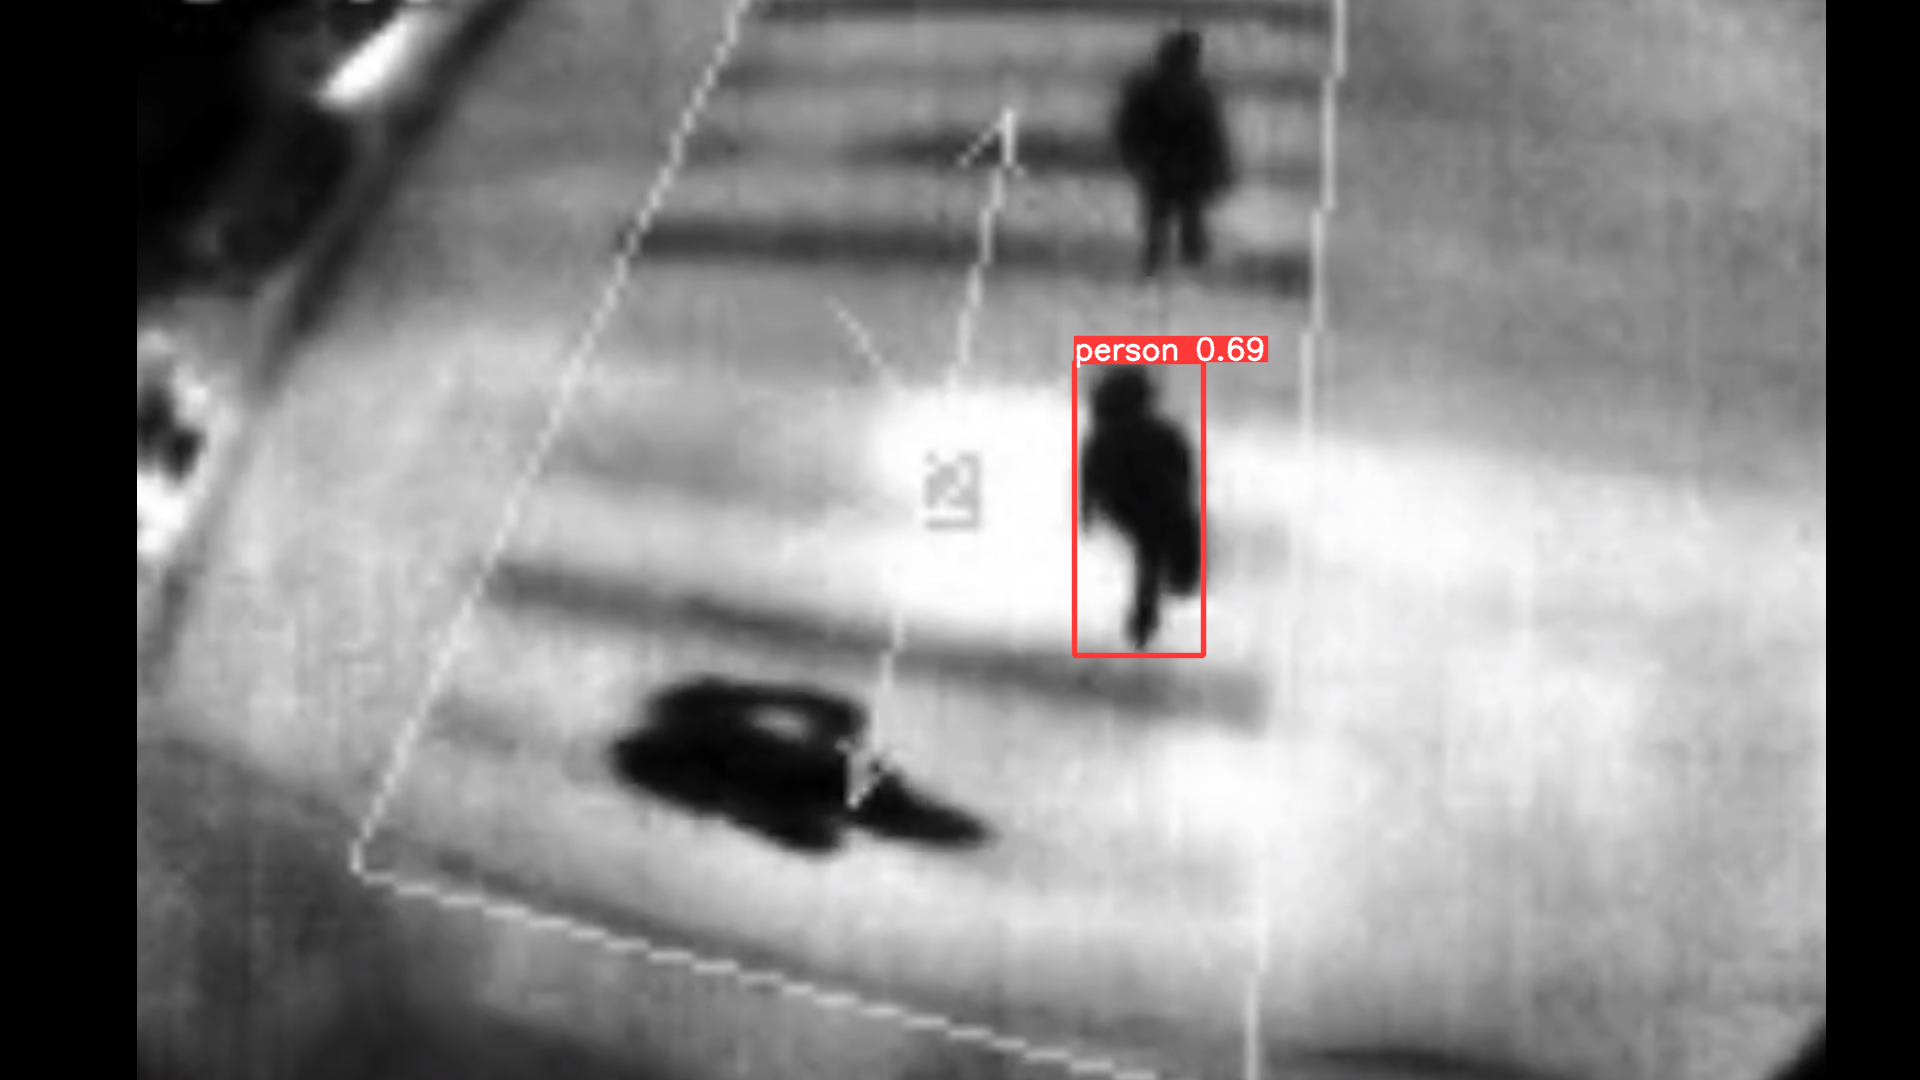

In [37]:
display.Image(filename='runs/detect/exp3/3.png', width=600)

Fine-tune the YOLOv5s model 30 epoch

In [38]:
!python train.py --img 1920 --batch 1 --epochs 30 --data ImgSet.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=ImgSet.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=1, imgsz=1920, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-4-24 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.

Visualize The result after tune. Change the path 'runs/detect/exp3/{1-8}.png' to view all result.

Test after fine-tune

In [43]:
!python detect.py --weights runs/train/exp20/weights/last.pt --img 1920 --conf 0.25 --source data/images

detect: weights=['runs/train/exp20/weights/last.pt'], source=data/images, data=data/coco128.yaml, imgsz=[1920, 1920], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-4-24 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/gdrive/MyDrive/project/yolo_person_tracking/yolov5/data/images/1.png: 1088x1920 3 persons, Done. (0.023s)
image 2/10 /content/gdrive/MyDrive/project/yolo_person_tracking/yolov5/data/images/2.png: 1088x1920 1 person, Done. (0.022s)
image 3/10 /content/gdrive/MyDrive/project/yolo_person_tracking/yolov5/data/images/3.png: 1088x1920 3 persons, Done. (0.022

Visualize The result after tune. Change the path 'runs/detect/exp{}/{1-8}.png' to view all result.See the saving path above.

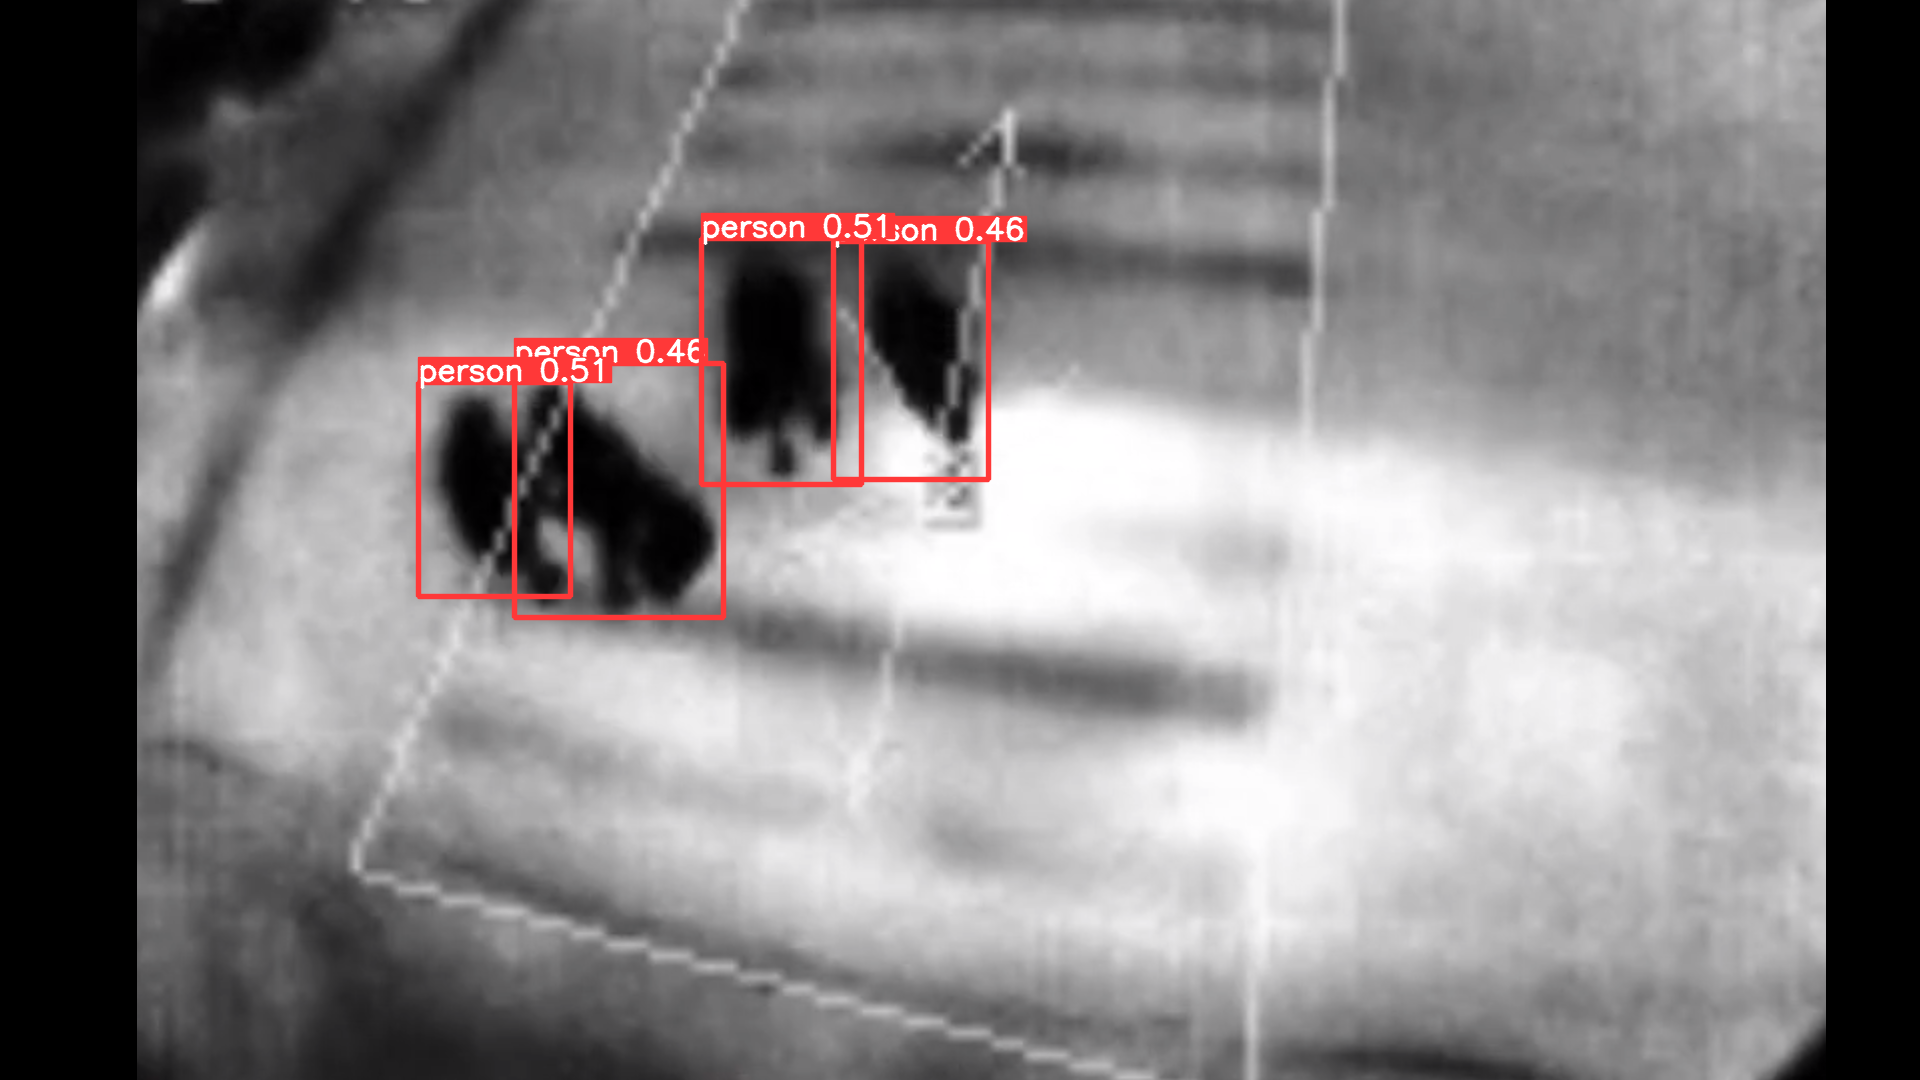

In [54]:
display.Image(filename='runs/detect/exp7/6.png', width=600)